In [2]:
import pandas as pd
import numpy as np
import polars
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
df['Glucose'].max()

199

In [12]:
df['Glucose'].count()

768

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.shape

(768, 9)

In [21]:
d=type(df)

In [22]:
d

pandas.core.frame.DataFrame

In [25]:
a=d.dtypes

In [26]:
a

In [28]:
from pandas import set_option

In [29]:
set_option('display.width', 100)
description=df.describe()

In [30]:
description

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
class_counts=df.groupby('Outcome').size()

In [33]:
class_counts

Outcome
0    500
1    268
dtype: int64

In [35]:
df = df.rename(columns={'Outcome': 'class'})

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Correlations Between Attributes

In [39]:
correlations=df.corr(method='pearson')

In [40]:
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Skew of Univariate Distributions

In [41]:
mySkew=df.skew()

In [42]:
mySkew

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
class                       0.635017
dtype: float64

# Histogram of the dataset

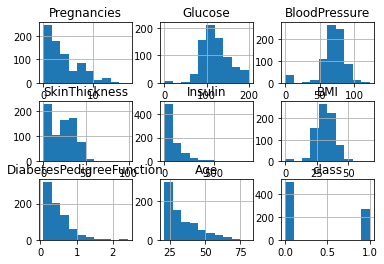

In [43]:
df.hist()
plt.show()

# Density Plots

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

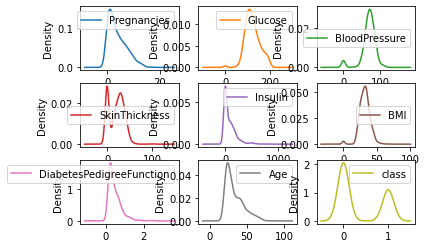

In [46]:
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False)

# Box and Whisker Plots

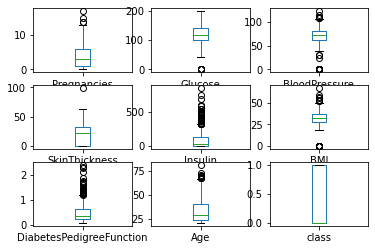

In [47]:
df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)

plt.show()

# Correlation Matrix Plot

In [48]:
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


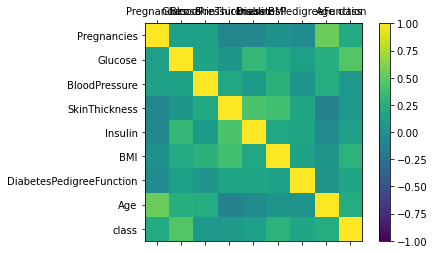

In [51]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks=np.arange(0, 9, 1)
names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'class']
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

In [52]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [54]:
from pandas.tools.plotting import scatter_matrix 

ModuleNotFoundError: No module named 'pandas.tools'

In [55]:
scatter_matrix(df)
plt.show()

NameError: name 'scatter_matrix' is not defined

# Prepare Your Data For Machine Learning

In [ ]:
Objectives
""""
Rescale data.
Standardize data.
Normalize data.
Binarize data.

"""

In [56]:
df=[['Ahmed', 35], ['Ali', 12], ['Apau', 34]]

df2=pd.DataFrame(df, columns=['Name', 'Age'])

In [57]:
df2

,Name,Age
0,Ahmed,35
1,Ali,12
2,Apau,34


In [58]:
df2[1:]

,Name,Age
1,Ali,12
2,Apau,34


In [59]:
myData={'Names':['Ahamed', 'Ali', 'Omar', 'Salma'],
       'Age':[12, 34, 15, 17]}



In [60]:
myData2=pd.DataFrame(myData, index=[100, 101, 102, 103])

In [61]:
myData2

,Names,Age
100,Ahamed,12
101,Ali,34
102,Omar,15
103,Salma,17


In [63]:
myData2[:2]

,Names,Age
100,Ahamed,12
101,Ali,34


In [65]:
myData2['Names']

100    Ahamed
101       Ali
102      Omar
103     Salma
Name: Names, dtype: object

In [67]:
def fahrenheit(T):
    
    return ((float(9)/5) * T + 32)


def celsius(T):
    return (float(5)/9 ) * (T - 32)


Temp=(15.8, 24, 45, 12)

F=list(map(fahrenheit, Temp))

C=list(map(celsius, F))


print(F)

print(C)

[60.44, 75.2, 113.0, 53.6]
[15.799999999999999, 24.000000000000004, 45.0, 12.000000000000002]


In [68]:
fib=[1, 2, 3, 4, 5, 6, 7, 8]
result=filter(lambda x: x % 2 == 0, fib)

for x in result:
    print(x)

2
4
6
8


In [69]:
f=lambda a, b: a if (a > b) else b

In [ ]:
reduce(f, [])

In [70]:
animals=['Lion', 'Tiger', 'Bear', 'Dog']
pd.Series(animals)

0     Lion
1    Tiger
2     Bear
3      Dog
dtype: object

In [71]:
animals[2]

'Bear'

In [72]:
s=pd.Series([70,90,65,25, 99])

In [73]:
s

0    70
1    90
2    65
3    25
4    99
dtype: int64

In [75]:
total=0

for val in s:
    
    total +=val
    
print(total)

349


In [76]:
total=np.sum(s)

In [77]:
total

349

In [78]:
import seaborn as sns

In [81]:
df=sns.load_dataset('tips')

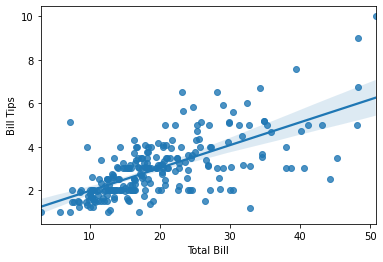

In [84]:
sns.regplot(x='total_bill', y='tip', data=df)

plt.xlabel('Total Bill')
plt.ylabel('Bill Tips')

plt.show()

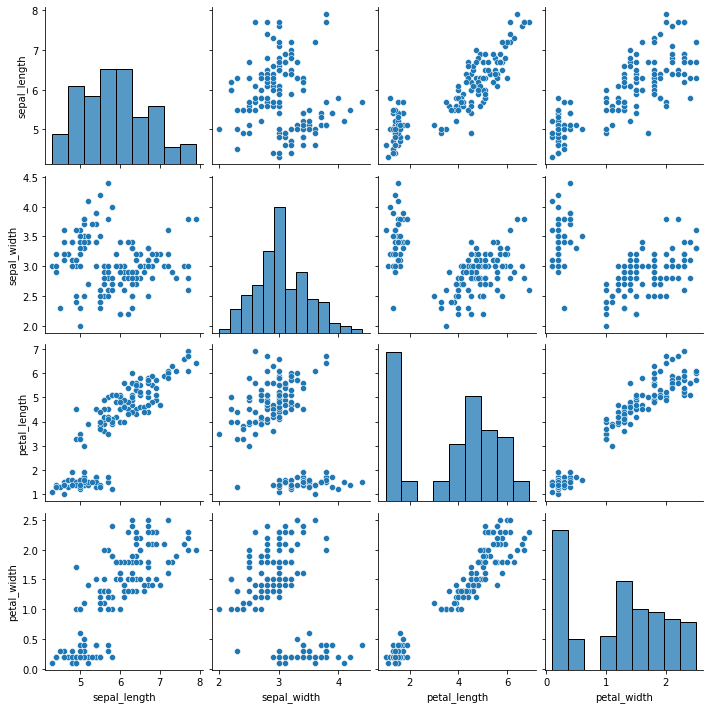

In [85]:
df=sns.load_dataset('iris')
sns.pairplot(df, kind='scatter')
plt.show()

In [87]:
d = {
'Name': pd.Series(['Ahmed','Omar','Ali','Salwa','Majid',
'Othman','Gameel','Ziad','Ahlam','Zahrah',
'Ayman','Alaa']),
'Age': pd.Series([34,26,25,27,30,54,23,43,40,30,28,46]),
'Height':pd.Series([114.23,173.24,153.98,172.0,153.20,164.6,
183.8,163.78,172.0,164.8 ])}


df=pd.DataFrame(d)

In [88]:
print(df.std())

Age        9.740574
Height    18.977090
dtype: float64


In [89]:
df.describe()

,Age,Height
count,12.000000,10.00000
mean,33.833333,161.56300
std,9.740574,18.97709
min,23.000000,114.23000
25%,26.750000,156.43000
50%,30.000000,164.70000
75%,40.750000,172.00000
max,54.000000,183.80000


<AxesSubplot:>

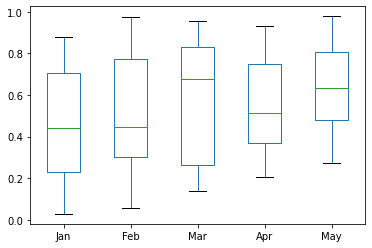

In [97]:
df=pd.DataFrame(np.random.rand(20, 5), 
               columns=['Jan', 'Feb', 'Mar', 'Apr', 'May'])



df.plot.box()

<AxesSubplot:title={'center':'Temperature over two months'}, xlabel='Feb', ylabel='Jan'>

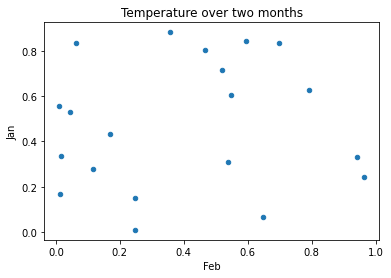

In [98]:
df=pd.DataFrame(np.random.rand(20, 5), columns=['Jan', 'Feb', 
                                               'Mar', 'Apr', 'May'])



df.plot.scatter(x='Feb', y='Jan', title='Temperature over two months')




In [ ]:
"""
Write a Python script to create a data frame for the
following table:

A. Create a bar plot of the sales volume
B. Create a pie chart of item sales
Name   Mobile_Sales TV_Sales
Ahmed 2540 2200
Omar  1370 1900
Ali   1320 2150
Ziad   2000 1850
Salwa   2100 1770
Lila   2150 2000

"""

In [99]:
salesMen=['Ahmed', 'Omar', 'Ali', 'Ziad', 'Salwa', 'Lila']


mobile_Sales=[2540, 1370, 1320, 2000, 2100, 2150]


TV_Sales=[2200, 1900, 2150, 1850, 1770, 2000]


df=pd.DataFrame()

In [100]:
df['Name']=salesMen

In [101]:
df['Mobile_Sales']=mobile_Sales

In [102]:
df['TV_Sales']=TV_Sales

In [103]:
df.set_index('Name', drop=True, inplace=True)

In [104]:
df

,Mobile_Sales,TV_Sales
Name,,
Ahmed,2540,2200
Omar,1370,1900
Ali,1320,2150
Ziad,2000,1850
Salwa,2100,1770
Lila,2150,2000


# Bar graph of sales

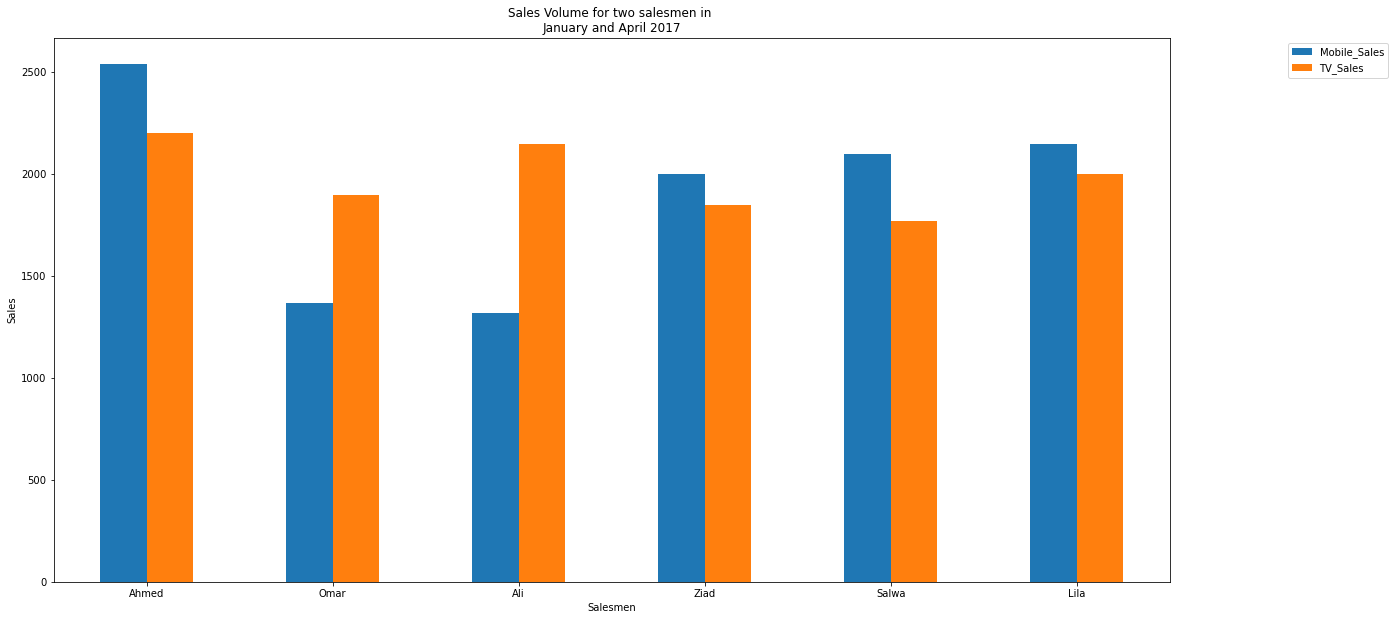

In [105]:
df.plot.bar(figsize=(20, 10), rot=0).legend(bbox_to_anchor=(1.2, 1))


plt.xlabel('Salesmen')
plt.ylabel('Sales')


plt.title('Sales Volume for two salesmen in \nJanuary and April 2017')


plt.show()

# Pie plot of Sales

array([<AxesSubplot:ylabel='Mobile_Sales'>,
       <AxesSubplot:ylabel='TV_Sales'>], dtype=object)

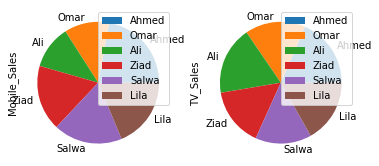

In [106]:


df.plot.pie(subplots=True)

# Box plot

<AxesSubplot:>

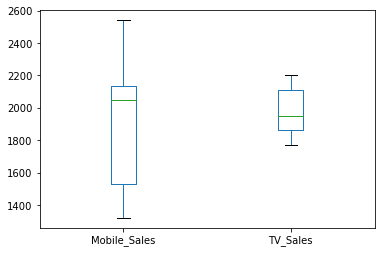

In [107]:
df.plot.box()

In [108]:
df.describe()

,Mobile_Sales,TV_Sales
count,6.000000,6.000000
mean,1913.333333,1978.333333
std,477.144283,170.342792
min,1320.000000,1770.000000
25%,1527.500000,1862.500000
50%,2050.000000,1950.000000
75%,2137.500000,2112.500000
max,2540.000000,2200.000000


# Area plot of sales

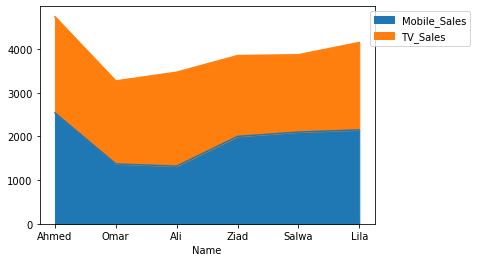

In [113]:
df.plot.area(figsize=(6, 4)).legend(bbox_to_anchor=(1.3, 1))


# E. Create a stacked bar plot of item sales

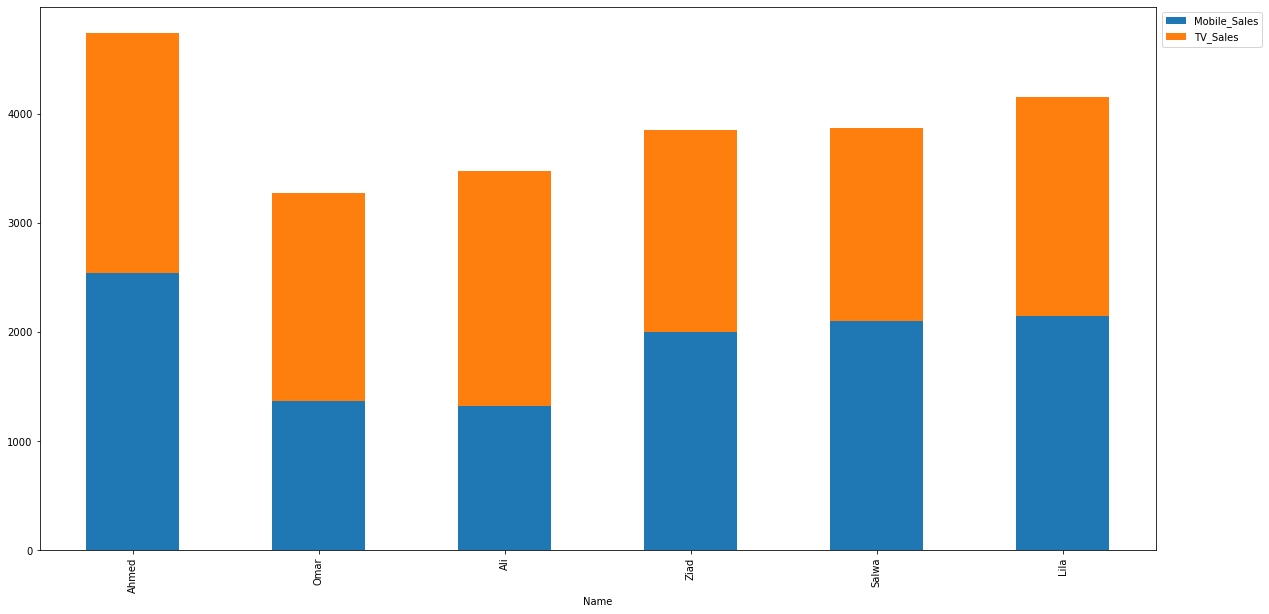

In [116]:
df.plot.bar(stacked=True, figsize=(20, 10)).legend(bbox_to_anchor=(1.1, 1))
            




In [117]:
df=pd.DataFrame({'A':[1, 2, 3], 'B':[4, 5, 6]})
df=df.assign(C=lambda x : x['A'] + x['B'])

df=df.assign(D=lambda x : x['A'] + x['C'])

In [118]:
df

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [119]:
df=df.assign(A=lambda x : x['A'] * 2)


In [120]:
df

,A,B,C,D
0,2,4,5,6
1,4,5,7,9
2,6,6,9,12


In [121]:
df.iloc[1]

A    4
B    5
C    7
D    9
Name: 1, dtype: int64

In [123]:
df['B']

0    4
1    5
2    6
Name: B, dtype: int64

In [124]:
df[:].T

,0,1,2
A,2,4,6
B,4,5,6
C,5,7,9
D,6,9,12


In [125]:
df.T.dot(df)

,A,B,C,D
A,56,64,92,120
B,64,77,109,141
C,92,109,155,201
D,120,141,201,261


In [127]:
myFile=open('text.txt')
file=myFile.read()
words=file.split()

counts=dict()

for word in words:
    counts[word]=counts.get(word, 0)+1
    

print(counts)

print('++++++++++++++++++++++++++++++++++++++++++\n')



bigCount=None
bigWord=None


for word, count in counts.items():
    if bigCount is None or count > bigCount:
        bigWord=word
        bigCount=count
        

        
print('\n\t\tBigWord and BigCount')
print(bigWord, bigCount)


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 166: character maps to <undefined>

In [131]:
myFile=open('text.txt', 'r')
print('Name of the file: ', myFile.name)

print('Closed or not : ', myFile.closed)

print('Opening mode : ', myFile.mode)




print('Closed or not : ', myFile.closed)

Name of the file:  text.txt
Closed or not :  False
Opening mode :  r
Closed or not :  False


In [135]:

df=pd.read_csv('users.csv')

In [137]:
df

,Country Internet Penetration Facebook Penetration
0,Brazil 49.9% 29.5%
1,Canada 86.8% 51.9%
2,Chile 61.4% 55.5%
3,China 42.3% 0.1%
4,Colombia 49.0% 36.3%
5,Egypt 44.1% 15.1%
6,France 83.0% 39.0%
7,Germany 84.0% 30.9%
8,Hong Kong 72.8% 56.4%
9,India 12.6% 5.1%
